# Missing value treatment and exporatory data analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re # regular expression => used for pattern matching
import calendar
import datetime as dt
plt.style.use('dark_background') ## using style

In [2]:
df=pd.read_csv(r"C:\Users\aarza\Desktop\python\Basics\Pandas\loan.csv")
df.head()

C:\Users\aarza\AppData\Local\Temp\ipykernel_14120\21045813.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\aarza\Desktop\python\Basics\Pandas\loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df=pd.read_csv(r"C:\Users\aarza\Desktop\python\Basics\Pandas\loan.csv",low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

# Missing value

In [5]:
df.isnull()# show whether the value is null or not by true or false

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [6]:
df.isnull().sum()# total NaN/missing value in all columns

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
df.isnull().sum()/len(df)# percent of NaN/Missing value in columns

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

In [8]:
def checkmissing(x,threshold=0): #threshold ) means no missing and 1 means all missing in column
    x=x.isnull().sum()/len(x)# calc missing value
    x=x.sort_values(ascending =False)# arranging the missing value information in descending
    x=x[x>threshold]# filtering all the missing value columns above  threshold
    return x

In [9]:
checkmissing(df,threshold=0.99)# checking columns with more than 99% missing value

verification_status_joint         1.0
annual_inc_joint                  1.0
mo_sin_old_rev_tl_op              1.0
mo_sin_old_il_acct                1.0
bc_util                           1.0
bc_open_to_buy                    1.0
avg_cur_bal                       1.0
acc_open_past_24mths              1.0
inq_last_12m                      1.0
total_cu_tl                       1.0
inq_fi                            1.0
total_rev_hi_lim                  1.0
all_util                          1.0
max_bal_bc                        1.0
open_rv_24m                       1.0
open_rv_12m                       1.0
il_util                           1.0
total_bal_il                      1.0
mths_since_rcnt_il                1.0
open_il_24m                       1.0
open_il_12m                       1.0
open_il_6m                        1.0
open_acc_6m                       1.0
tot_cur_bal                       1.0
tot_coll_amt                      1.0
mo_sin_rcnt_rev_tl_op             1.0
mo_sin_rcnt_

In [10]:
## Above results are series so we will be using index value which are the columns name and 1 is value
## series contain index and value but list only contain values
col=checkmissing(df,threshold=0.99).index
col

Index(['verification_status_joint', 'annual_inc_joint', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
       'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'tot_cur_bal', 'tot_coll_amt', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_rev_tl_bal_gt_0', 'total_bc_limit',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts',
       'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl',
       'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl',
       'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq',
       'mths_since_rec

In [11]:
df=df.drop(col,axis=1)#Droping all columns with more than 99% missing values

In [12]:
df.shape

(39717, 57)

In [13]:
checkmissing(df,threshold=0.5)# Dropping all columns with more than 50% missing value

next_pymnt_d              0.971297
mths_since_last_record    0.929854
mths_since_last_delinq    0.646625
dtype: float64

In [14]:
df[['next_pymnt_d','mths_since_last_record']].head()

,next_pymnt_d,mths_since_last_record
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,Jun-16,NaN


In [15]:
df['mths_since_last_record'].unique()

array([ nan, 113., 105.,  97.,  33.,  93.,  52.,  85.,  90.,  91., 114.,
        92., 117.,  87.,  45.,  83., 118.,  38., 101., 100., 112., 110.,
        88.,  79.,  77., 107., 102.,  98.,  95., 103.,  96., 116., 111.,
        89., 108.,  29., 106., 115.,  53.,  86.,  57.,  63.,  94., 109.,
        99., 104.,  76.,  61.,  28.,  23.,  75.,  47.,  82.,  21.,  62.,
        44.,  80.,  67., 119.,  42.,  34.,  66.,  58.,  22.,  56.,  72.,
        64.,  50.,  69.,  49.,  74.,  35.,  12.,  26.,  78.,  54.,  37.,
        73.,  11.,  31.,  59.,  32.,  81.,  68.,  55.,  39.,  51.,  70.,
        30.,  41.,  71.,  40.,  43.,  27.,  65.,  46.,  19.,  17.,  25.,
        13.,  48.,  36.,   7.,  60.,  14.,   6.,  18.,   0.,  20., 120.,
       129.,   5.])

In [16]:
df['mths_since_last_record'].fillna(999,inplace=True) ## replacing with 999 as old data and 0 means recent data

In [17]:
df['mths_since_last_delinq'].unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0.])

In [18]:
df['mths_since_last_delinq'].fillna(999,inplace=True)

In [19]:
del df['next_pymnt_d'] # we cannot get information about it 

In [20]:
checkmissing(df,threshold=0.3)

desc    0.325805
dtype: float64

In [21]:
df['desc'].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

In [22]:
df['desc'].nunique()

26527

In [23]:
del df['desc']

In [24]:
checkmissing(df,threshold=0)

emp_title                     0.061913
emp_length                    0.027066
pub_rec_bankruptcies          0.017549
last_pymnt_d                  0.001788
chargeoff_within_12_mths      0.001410
collections_12_mths_ex_med    0.001410
revol_util                    0.001259
tax_liens                     0.000982
title                         0.000277
last_credit_pull_d            0.000050
dtype: float64

In [25]:
df['emp_title']

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [26]:
df['emp_title'].nunique()

28820

In [27]:
del df['emp_title']

In [28]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [29]:
re.findall('\d','10+ year') ## re => regular expression : find pattern in text

['1', '0']

In [30]:
re.findall('\d+','10+ year')[0]

'10'

In [31]:
float(re.findall('\d+','10+ year')[0])

10.0

In [32]:
def clean(x):
    x=str(x)
    if x == 'nan': ## if nan then return np.nan
        x=np.nan
    elif '<' in x: ## if less than symbol return 0
        x=0
    else:
        x=float(re.findall('\d+',x)[0])# else statement the number and convert to float
    return x

In [33]:
df['emp_length']=df['emp_length'].apply(clean)

In [34]:
df[['emp_length']].head()

,emp_length
0,10.0
1,0.0
2,10.0
3,10.0
4,1.0


In [35]:

# replacing missing value by mean of emp length

In [36]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [37]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(0)

In [38]:
df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [39]:
for i in calendar.month_abbr:
    print(i)


Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec


In [40]:
for i,j in enumerate(calendar.month_abbr):
    print(i,j)

0 
1 Jan
2 Feb
3 Mar
4 Apr
5 May
6 Jun
7 Jul
8 Aug
9 Sep
10 Oct
11 Nov
12 Dec


In [41]:
month2num=dict([(j,i) for i,j in enumerate(calendar.month_abbr)])
month2num

{'': 0,
 'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [42]:
month2num['Jan']

1

In [43]:
x='Jan-08'
x=x.split('-')
x

['Jan', '08']

In [44]:
x[0]

'Jan'

In [45]:
month_number=month2num[x[0]]
month_number

1

In [46]:
x[1]

'08'

In [47]:
year=2000+int(x[1])
year

2008

In [48]:
dt.datetime(year,month_number,1) #dt.datetime(year,month)

datetime.datetime(2008, 1, 1, 0, 0)

In [49]:
def convertdate(x):
    try:
        x=x.split('-')#------will return list of strings
        year=2000+int(x[1])
        month_number=month2num[x[0]] 
        x=dt.datetime(year,month_number,1)
    except:
        x=np.nan
    return x

In [50]:
convertdate('Jan-15')

datetime.datetime(2015, 1, 1, 0, 0)

In [51]:
df['last_pymnt_d']=df['last_pymnt_d'].apply(convertdate)

In [52]:
df[['last_pymnt_d']].head()

,last_pymnt_d
0,2015-01-01
1,2013-04-01
2,2014-06-01
3,2015-01-01
4,2016-05-01


In [53]:
# if we drop the remaining Na's what loss of data we will have

In [54]:
(1-len(df.dropna())/len(df))*100
# 0.4% loss is very loss in information so we will drop all the na rows

0.4683133167157627

In [55]:
df=df.dropna()

In [56]:
checkmissing(df,threshold=0)# empty list shows no missing values in the data

Series([], dtype: float64)

In [57]:
df.shape

(39531, 54)

In [58]:
# Ml models requires only number they don't understand text
# So we will check all object columns to understand which column to convert
# to numerical and which to dummy one hot encoded column

In [59]:
df.select_dtypes('O') # O stands for object

,term,int_rate,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,Apr-99,9.40%,f,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,Feb-96,21%,f,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,RENT,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,Jan-96,53.90%,f,May-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39661,36 months,7.75%,A,A3,OWN,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,vacation,Vacation,981xx,WA,Sep-84,0.70%,f,Aug-07,INDIVIDUAL
39662,36 months,7.75%,A,A3,OWN,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,landscape improvement,981xx,WA,Sep-84,1%,f,Aug-07,INDIVIDUAL
39663,36 months,10.91%,C,C3,RENT,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,car,Not so new car,232xx,VA,Aug-01,79.60%,f,Jun-11,INDIVIDUAL
39664,36 months,8.70%,B,B1,RENT,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Zach's Pre-Blis Loan,100xx,NY,Aug-00,19.80%,f,Aug-10,INDIVIDUAL


In [60]:
df.select_dtypes('O').columns # All the columns for object datatype columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'revol_util', 'initial_list_status', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [61]:
for i in df.select_dtypes('O').columns:
    print(f'{i}:{df[i].nunique()}')

term:2
int_rate:371
grade:7
sub_grade:35
home_ownership:5
verification_status:3
issue_d:53
loan_status:3
pymnt_plan:1
url:39531
purpose:14
title:19509
zip_code:821
addr_state:50
earliest_cr_line:526
revol_util:1089
initial_list_status:1
last_credit_pull_d:103
application_type:1


In [62]:
# Dropping columns with only 1 and many
df.drop(['application_type','pymnt_plan','initial_list_status','url','title'],axis=1,inplace=True)

In [63]:
df.shape

(39531, 49)

In [64]:
for i in df.select_dtypes('O').columns:
    print(f'{i}:{df[i].nunique()}')

term:2
int_rate:371
grade:7
sub_grade:35
home_ownership:5
verification_status:3
issue_d:53
loan_status:3
purpose:14
zip_code:821
addr_state:50
earliest_cr_line:526
revol_util:1089
last_credit_pull_d:103


In [65]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [66]:
# Convert the term to dummies in final process during ML
#( Also known as one hot encoding => in which in a one row there is only 1 othe are 0)
pd.get_dummies(df['term'])

,36 months,60 months
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
39661,1,0
39662,1,0
39663,1,0
39664,1,0


In [67]:
# as n categories in a column can be represented by n-1 dummy columns
# we will drop the first dummy column normally
pd.get_dummies(df['term'],drop_first=True)

,60 months
0,0
1,1
2,0
3,0
4,1
...,...
39661,0
39662,0
39663,0
39664,0


In [68]:
# Adding the dummy column to the actual data
dummy_term=pd.get_dummies(df['term'],drop_first=True)
dummy_term.head()

,60 months
0,0
1,1
2,0
3,0
4,1


In [69]:
df=pd.concat([df,dummy_term],axis=1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,60 months
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,0,0.0,0,0.0,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,0,0.0,0,0.0,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,0,0.0,0,0.0,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,0,0.0,0,0.0,0.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,0,0.0,0,0.0,0.0,1


In [70]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [71]:
pd.get_dummies(df['verification_status'])

,Not Verified,Source Verified,Verified
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
39661,1,0,0
39662,1,0,0
39663,1,0,0
39664,1,0,0


In [72]:
dummy_status=pd.get_dummies(df['verification_status'],drop_first=True)
dummy_status.head()

,Source Verified,Verified
0,0,1
1,1,0
2,0,0
3,1,0
4,1,0


In [73]:
df=pd.concat([df,dummy_status],axis=1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,60 months,Source Verified,Verified
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.0,1,0,0.0,0,0.0,0.0,0,0,1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,1,0,0.0,0,0.0,0.0,1,1,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.0,1,0,0.0,0,0.0,0.0,0,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.0,1,0,0.0,0,0.0,0.0,0,1,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.0,1,0,0.0,0,0.0,0.0,1,1,0


In [74]:
# We will not append all the dummy column now as we need to do it after EDA
# While doing modelling

In [75]:
df['int_rate'].unique()# Number is stored as string along with % sign

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%', '19.91%',
       '17.27%', '14.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [76]:
re.findall('\d+','10.5%')

['10', '5']

In [77]:
re.findall('[0-9.]','10.5') # find individual character we added . as it contains decimal

['1', '0', '.', '5']

In [78]:
re.findall('[0-9.]+','10.5%') # +sign to include the group

['10.5']

In [79]:
df['int_rate']=df['int_rate'].apply(lambda x : float(re.findall('[0-9.]+',x)[0]))

In [80]:
df[['int_rate']].head()

,int_rate
0,10.65
1,15.27
2,15.96
3,13.49
4,12.69


In [81]:
df['grade'].unique()#we can convert it to dummies

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [82]:
df['sub_grade'].unique() # we can convert it to dummies

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3', 'C2',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [83]:
int('B2'[-1])

2

In [84]:
df['sub_grade']=df['sub_grade'].apply(lambda x:int(x[-1]))

In [85]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,60 months,Source Verified,Verified
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,2,...,0.0,1,0,0.0,0,0.0,0.0,0,0,1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,4,...,0.0,1,0,0.0,0,0.0,0.0,1,1,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,5,...,0.0,1,0,0.0,0,0.0,0.0,0,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,1,...,0.0,1,0,0.0,0,0.0,0.0,0,1,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,5,...,0.0,1,0,0.0,0,0.0,0.0,1,1,0


In [86]:
# Non ordinal categorical columns must be convert to dummies
# ordinal categorical columns must be converted to numbers

In [87]:
df['home_ownership'].unique() # can be converted to dummies

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [88]:
df['verification_status'].unique() # can be converted into dummies

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [89]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [90]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [91]:
df['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [92]:
del df['earliest_cr_line']
# this column is not useful to us as we will not require when the person first took loan

In [93]:
df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [94]:
df['revol_util']=df['revol_util'].apply(lambda x:float(re.findall('[0-9]+',x)[0]))

In [95]:
df['zip_code'].unique()

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '150xx', '326xx', '564xx', '141xx', '080xx', '330xx',
       '974xx', '934xx', '405xx', '946xx', '445xx', '850xx', '604xx',
       '292xx', '088xx', '180xx', '029xx', '700xx', '010xx', '441xx',
       '104xx', '061xx', '616xx', '947xx', '914xx', '765xx', '980xx',
       '017xx', '752xx', '787xx', '077xx', '540xx', '225xx', '440xx',
       '437xx', '559xx', '912xx', '325xx', '300xx', '923xx', '352xx',
       '013xx', '146xx', '074xx', '786xx', '937xx', '331xx', '115xx',
       '191xx', '114xx', '908xx', '902xx', '992xx', '750xx', '950xx',
       '329xx', '226xx', '614xx', '802xx', '672xx', '083xx', '100xx',
       '926xx', '931xx', '712xx', '060xx', '707xx', '342xx', '895xx',
       '430xx', '919xx', '996xx', '891xx', '935xx', '801xx', '928xx',
       '233xx', '927

In [96]:
del df['last_credit_pull_d']

In [97]:
df.drop(['id','member_id'],axis=1,inplace=True)
# primary key is not used in machine learning

In [98]:
df.shape

(39531, 48)

In [99]:
df.dtypes

loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                              int64
emp_length                           float64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                               object
loan_status                           object
purpose                               object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                            int64
inq_last_6mths                         int64
mths_since_last_delinq               float64
mths_since_last_record               float64
open_acc  

# Performing EDA

purpose of EDA is to understand the data better through visualization or summeries objective : to find results for loan defaults

In [100]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,60 months,Source Verified,Verified
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,10.0,RENT,...,0.0,1,0,0.0,0,0.0,0.0,0,0,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,0.0,RENT,...,0.0,1,0,0.0,0,0.0,0.0,1,1,0


C:\Users\aarza\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


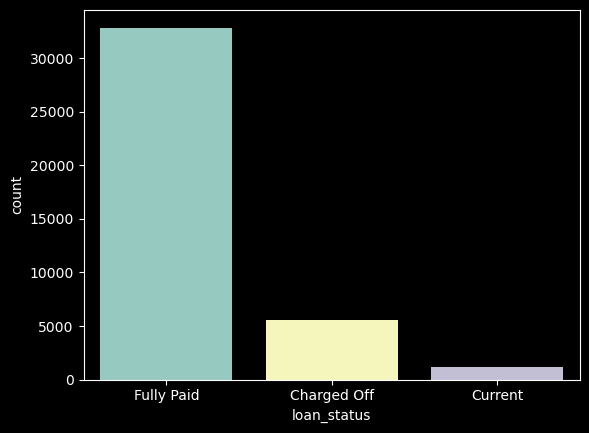

In [101]:
## understanding loan distribution
plt.figure()
sns.countplot(df['loan_status'])
plt.show()

In [102]:
# filtering out current loan status because that are ongoing loans
# to identify behaviour of loan that are getting defaulted we need fully paid and charged off
ds=df[df['loan_status'] != 'Current']

In [103]:
# finding % of default and non default
ds.groupby('loan_status').loan_amnt.count()# Absolute count of each category

loan_status
Charged Off     5535
Fully Paid     32856
Name: loan_amnt, dtype: int64

In [104]:
temp = ds.groupby('loan_status').loan_amnt.count()/len(ds)*100 # percentage of each category
temp

loan_status
Charged Off    14.417442
Fully Paid     85.582558
Name: loan_amnt, dtype: float64

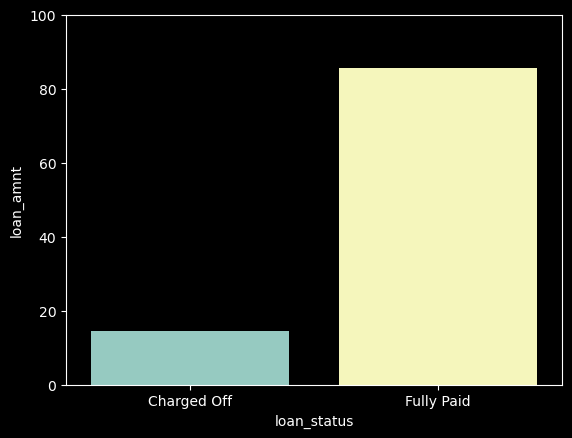

In [105]:
plt.figure()
sns.barplot(x=temp.index,y=temp)
plt.ylim(0,100)
plt.show()

the data has 85% fully paid and approx 15% charged off in the dataset

^

#### Effect of term on charged off category

In [106]:
# term means how much period loan has been taken

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

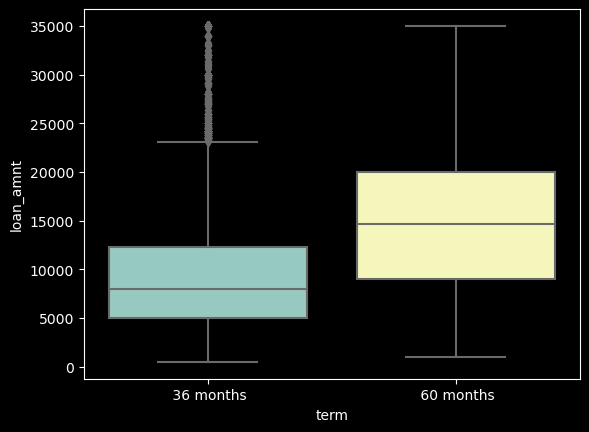

In [107]:
sns.boxplot(x='term',y='loan_amnt',data=ds)

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

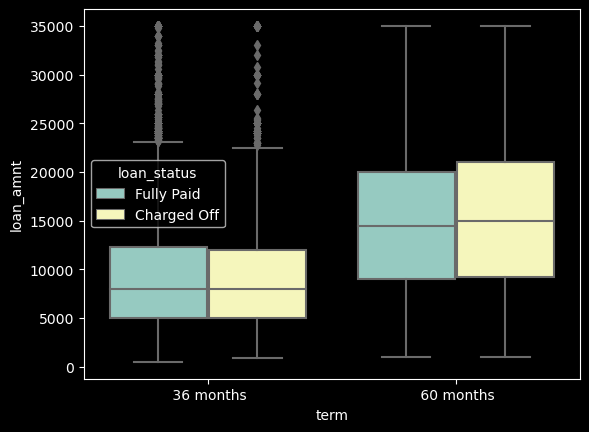

In [108]:
sns.boxplot(x='term',y='loan_amnt',data=ds,hue='loan_status')# hue help to differentiat

##### no clear distinction btw fully paid and charged off based on loan amount and term

# Understanding the impact of grade on loan status

In [109]:
temp=ds.groupby(['grade','loan_status']).loan_amnt.count()
temp

grade  loan_status
A      Charged Off      596
       Fully Paid      9420
B      Charged Off     1408
       Fully Paid     10233
C      Charged Off     1316
       Fully Paid      6466
D      Charged Off     1101
       Fully Paid      3948
E      Charged Off      702
       Fully Paid      1939
F      Charged Off      315
       Fully Paid       652
G      Charged Off       97
       Fully Paid       198
Name: loan_amnt, dtype: int64

In [110]:
temp=temp.reset_index(drop=False)
temp

,grade,loan_status,loan_amnt
0,A,Charged Off,596
1,A,Fully Paid,9420
2,B,Charged Off,1408
3,B,Fully Paid,10233
4,C,Charged Off,1316
5,C,Fully Paid,6466
6,D,Charged Off,1101
7,D,Fully Paid,3948
8,E,Charged Off,702
9,E,Fully Paid,1939


<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

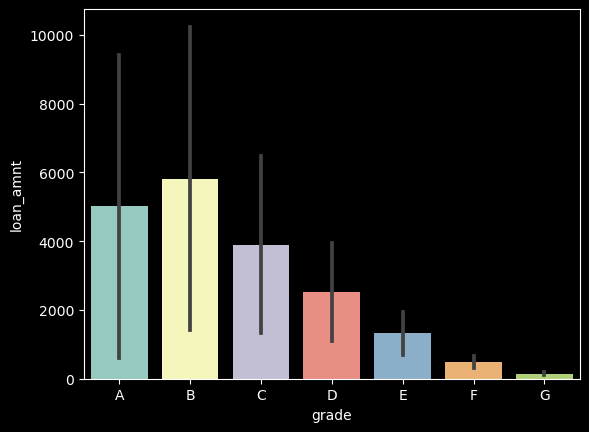

In [111]:
sns.barplot(x='grade',y='loan_amnt',data=temp)

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

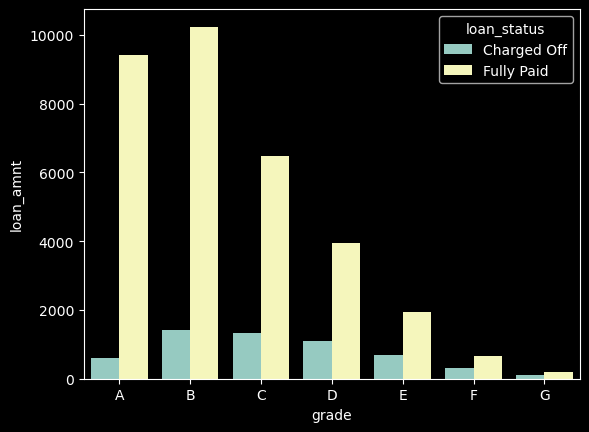

In [112]:
sns.barplot(x='grade',y='loan_amnt',data=temp,hue='loan_status')

Loan grade B and C have the highest charged off

# Understanding impact of home ownership on charged off

In [120]:
temp=ds.groupby(['home_ownership','loan_status']).loan_amnt.count().sort_values(ascending=False)
temp

home_ownership  loan_status
RENT            Fully Paid     15596
MORTGAGE        Fully Paid     14661
RENT            Charged Off     2778
OWN             Fully Paid      2520
MORTGAGE        Charged Off     2303
OWN             Charged Off      436
OTHER           Fully Paid        78
                Charged Off       18
NONE            Fully Paid         1
Name: loan_amnt, dtype: int64

In [121]:
temp=temp.reset_index(drop=False)
temp

,home_ownership,loan_status,loan_amnt
0,RENT,Fully Paid,15596
1,MORTGAGE,Fully Paid,14661
2,RENT,Charged Off,2778
3,OWN,Fully Paid,2520
4,MORTGAGE,Charged Off,2303
5,OWN,Charged Off,436
6,OTHER,Fully Paid,78
7,OTHER,Charged Off,18
8,NONE,Fully Paid,1


<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

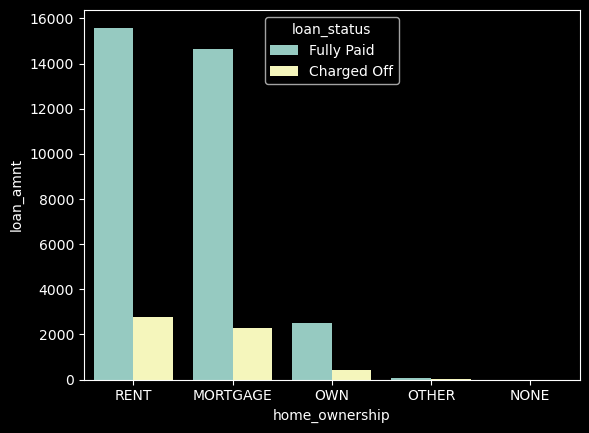

In [122]:
sns.barplot(x='home_ownership',y='loan_amnt',data=temp,hue='loan_status')

Hence the Mortgage and rent have highest % of loan amount

# understanding the effect of purpose

In [126]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [127]:
temp=ds.groupby(['purpose','loan_status']).loan_amnt.count().sort_values(ascending=False)
temp

purpose             loan_status
debt_consolidation  Fully Paid     15267
credit_card         Fully Paid      4471
other               Fully Paid      3214
debt_consolidation  Charged Off     2732
home_improvement    Fully Paid      2519
major_purchase      Fully Paid      1922
car                 Fully Paid      1337
small_business      Fully Paid      1273
wedding             Fully Paid       829
other               Charged Off      621
medical             Fully Paid       574
credit_card         Charged Off      537
moving              Fully Paid       480
small_business      Charged Off      464
home_improvement    Charged Off      339
vacation            Fully Paid       319
house               Fully Paid       307
educational         Fully Paid       261
major_purchase      Charged Off      216
car                 Charged Off      159
medical             Charged Off      105
moving              Charged Off       92
wedding             Charged Off       89
renewable_energy    Fully

In [128]:
temp=temp.reset_index(drop=False)
temp

,purpose,loan_status,loan_amnt
0,debt_consolidation,Fully Paid,15267
1,credit_card,Fully Paid,4471
2,other,Fully Paid,3214
3,debt_consolidation,Charged Off,2732
4,home_improvement,Fully Paid,2519
5,major_purchase,Fully Paid,1922
6,car,Fully Paid,1337
7,small_business,Fully Paid,1273
8,wedding,Fully Paid,829
9,other,Charged Off,621


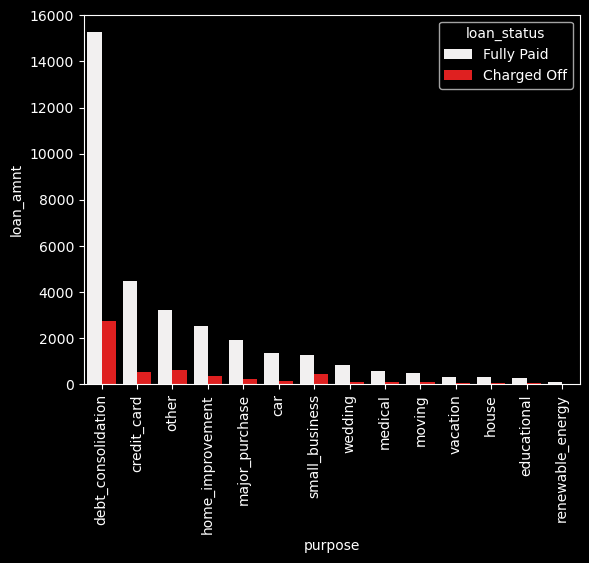

In [137]:
sns.color_palette("tab10")
sns.barplot(x='purpose',y='loan_amnt',data=temp,hue='loan_status',color='r')
plt.xticks(rotation=90)
plt.show()

the highest charged off is under loan_purpose is debt , other and small business